# Trabalho Interdisciplinar - KHIATA (Transformando o Mundo Juntos)

## <h3> Explicação da Base de Dados:
A nossa base de dados foi criada a partir de um formulário (FORMS), contendo oito colunas (sete atributos e uma resposta). Abaixo está a descrição de cada uma das colunas:

<hr>

#### <h4><strong> Atributos </strong>

<strong> 1. Faixa_Etaria: </strong> Qual faixa etária a pessoa se encaixa <br>

<strong> 2. Consumiu_Prod_Artesanal: </strong> Verifica se a pessoa já consumiu algum produto artesanal ou não <br>

<strong> 3. Nvl_Interesse_Prod_Artesanal: </strong> Nível de interesse em produto artesanais <br>

<strong> 4. Freq_Compra_Prod_Artesanal: </strong> Frequência de compra de produtos artesanais <br>

<strong> 5. Utilizou_App_Prod_Artesanal: </strong> A pessoa já utilizou um produto artesanal ou não <br>

<strong> 6. Tipo_Produto_Mais_Interessado: </strong> Tipo de produto que a pessoa mais se interessa <br>

<strong> 7. Faixa_Preco_Interessado: </strong> A faixa de preço no qual a pessoa pagaria por um produto artesanal <br>

<hr>

#### <h4><strong> Resposta </strong>

<strong> 8. Utilizaria_App_Costura: </strong> Se a pessoa utilizaria ou não um app voltado a costura <br>

<hr>

In [ ]:
# Importações para análise de dados
import pandas as pd
import numpy as np

# Imporatações para o PCA
from sklearn.decomposition import PCA

# Importações para o Pré-processamento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Importação para separar o treino e teste
from sklearn.model_selection import train_test_split

# Importação para aumentar nossa base de dados, duplicamento de dados
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# Importações para as Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importações para o Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Importações para plotarmos
import matplotlib.pyplot as plt
import seaborn as sns

# Importações para a Serialização
import pickle as pkl

# Importação para o Pipeline
from sklearn.pipeline import Pipeline

df = pd.read_csv(r'python\utils\FormsKhiataTratada.csv')

- Nosso objetivo é verificar se a pessoa é um potencial cliente ou não do nosso aplicativo

#### Separação Atributos e Resposta

In [3]:
# Atributos
atributos = df.drop('Utilizaria_App_Costura', axis=1)

# Resposta
resposta = df['Utilizaria_App_Costura']

#### Criando preprocessadores

In [4]:
# Instanciando o labelEncoder - resposta
# Usando o labelEncoder para a resposta
label_encoder = LabelEncoder()

# Transformando os atributos de valores categóricos para valores numéricos
# Usando o ColumnTransformer() para transformar
# Usando o OrdinalEncoder() para ordenar as colunas

preprocessador = ColumnTransformer(transformers = [
    ('categoricas', OrdinalEncoder(), make_column_selector(dtype_include = ['object', 'bool'])),
    ],
    remainder='passthrough', # para preservar as colunas não transformadas no dataset, as colunas transformardas vão aparecer em primeiro no df
    verbose_feature_names_out = False # False para não colocar prefixo _categoricas nas colunas transformadas
)

#### Aplicando o pré-processador

In [5]:
# preprocessador para variáveis de resposta
resposta_pre = label_encoder.fit_transform(resposta) # resposta_pre variável sendo a coluna de resposta preprocessadas

# preprocessador atributos
atributos_pre = pd.DataFrame(preprocessador.fit_transform(atributos), columns = preprocessador.get_feature_names_out())

# Nome das colunas na nova ordem - O columnsTransformer ordena de acordo com as novas transformações
colunas_novas = preprocessador.get_feature_names_out()

# Capturando os nomes originais
colunas_originais = atributos.columns

# Criando o dataFrame com a mesma ordem inicial de colunas
atributos_pre = atributos_pre[colunas_originais] # atributos_pre variáveis sendo a coluna de atributos preprocessadas.

### Separando em Treino e Teste

In [6]:
X_treino, X_teste, y_treino, y_teste = train_test_split(atributos_pre, resposta_pre, test_size = 0.20, random_state=42)

### Duplicando os Dados

- Para tentar melhorar o desempenho dos nossos modelos, vamos aumentar a nossa base de dados.

- O processo do Smote cria dados a partir dos registros do dataset igualmente. Ao colocar o k_neigbors = 5, ele vai ser basear nos 5 pontos mais próximos para criar um novo dado.

In [7]:
smote = SMOTE(k_neighbors = 5, random_state = 42)
X_treino_smote, y_treino_smote = smote.fit_resample(X_treino, y_treino)

## Modelos

### Naive Bayes 𝄜

Criando o classificador

In [8]:
# Classificador GaussianNB
classificador_bayes = GaussianNB()

# Classificador GaussianNB com SMOTE
classificador_bayes_smote = GaussianNB()

# Treinando o Modelo
classificador_bayes.fit(X_treino, y_treino)

# Treinando o Modelo com o SMOTE
classificador_bayes_smote.fit(X_treino_smote, y_treino_smote)

GaussianNB()

Prevendo o Modelo (Conjunto de teste)

In [9]:
# Prevendo o Modelo
previsoes_bayes = classificador_bayes.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_bayes_smote = classificador_bayes_smote.predict(X_teste)

#### Mostrando as métricas (Antes do Cross Validation)

In [10]:
nome_das_classes_bayes = [str(classe) for classe in label_encoder.classes_]

reporte_de_classificacao_bayes = classification_report(y_teste, previsoes_bayes, target_names = nome_das_classes_bayes)
print("Métricas Bayes: \n", reporte_de_classificacao_bayes)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_bayes_smote = classification_report(y_teste, previsoes_bayes_smote, target_names = nome_das_classes_bayes)
print("Métricas Bayes com SMOTE: \n", reporte_de_classificacao_bayes_smote)

Métricas Bayes: 
               precision    recall  f1-score   support

         Não       1.00      0.14      0.25        14
         Sim       0.52      1.00      0.68        13

    accuracy                           0.56        27
   macro avg       0.76      0.57      0.47        27
weighted avg       0.77      0.56      0.46        27

-------------------------------------------------------------
Métricas Bayes com SMOTE: 
               precision    recall  f1-score   support

         Não       0.40      0.29      0.33        14
         Sim       0.41      0.54      0.47        13

    accuracy                           0.41        27
   macro avg       0.41      0.41      0.40        27
weighted avg       0.41      0.41      0.40        27



##### Matriz de Confusão

Matriz de Confusão Bayes: 
[[ 2 12]
 [ 0 13]]


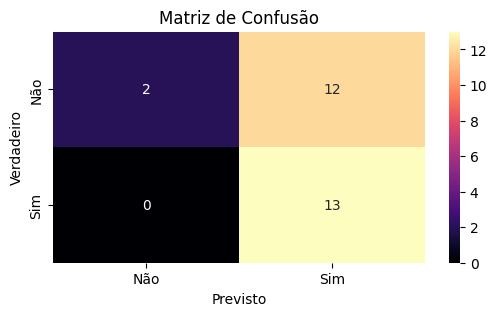

----------------------------------------------------------------
Matriz de Confusão Bayes com SMOTE: 
[[ 4 10]
 [ 6  7]]


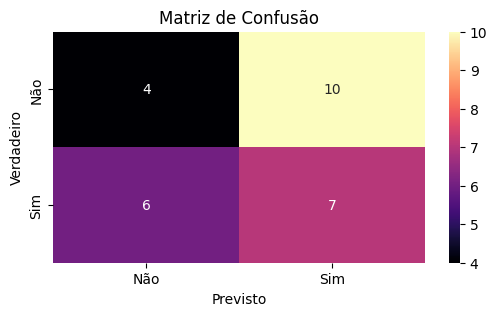

In [11]:
matriz_de_confusao_bayes = confusion_matrix(y_teste, previsoes_bayes)
print(f"Matriz de Confusão Bayes: \n{matriz_de_confusao_bayes}")

# Plotando a Matriz de Confusão
plt.figure(figsize = (6,3))
sns.heatmap(matriz_de_confusao_bayes, annot = True, fmt = 'd', cmap = 'magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

print("----------------------------------------------------------------")

matriz_de_confusao_bayes_smote = confusion_matrix(y_teste, previsoes_bayes_smote)
print(f"Matriz de Confusão Bayes com SMOTE: \n{matriz_de_confusao_bayes_smote}")

# Plotando a Matriz de Confusão
plt.figure(figsize = (6,3))
sns.heatmap(matriz_de_confusao_bayes_smote, annot = True, fmt = 'd', cmap = 'magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

#### Cross Validation

In [12]:
# Criando classificador Cross Validation
classificador_bayes_cross_validation = KNeighborsClassifier()

# Parâmetros para o Cross Validation
parametros = {}

# Usando o GridSearchCV
bayes_cross_validation_grid = GridSearchCV(estimator=classificador_bayes_cross_validation, param_grid=parametros, scoring="f1", cv=KFold(n_splits=5, random_state=42, shuffle=True))

# Treinando o Modelo
bayes_cross_validation_grid.fit(X_treino, y_treino)

# Testando o Modelo
previsoes_bayes_cross_validation_grid = bayes_cross_validation_grid.predict(X_teste)

print("-"*100)

# Mostrando as melhor acurácia
bayes_resultados = bayes_cross_validation_grid.cv_results_
bayes_acuracias_cross_validation = bayes_resultados['mean_test_score']

bayes_melhor_acuracias = sorted(bayes_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", bayes_melhor_acuracias)

bayes_acuracias_media = np.mean(bayes_melhor_acuracias)
print("Média das acurácias ENTROPY: ", bayes_acuracias_media)

print("-"*100)

----------------------------------------------------------------------------------------------------
Melhores acurácias:  [0.6468485537451054]
Média das acurácias ENTROPY:  0.6468485537451054
----------------------------------------------------------------------------------------------------


Métricas

In [13]:
reporte_de_classificacao_bayes_cross_validation = classification_report(y_teste, previsoes_bayes_cross_validation_grid, target_names = nome_das_classes_bayes)
print("Métricas Bayes: \n", reporte_de_classificacao_bayes_cross_validation)

Métricas Bayes: 
               precision    recall  f1-score   support

         Não       0.40      0.29      0.33        14
         Sim       0.41      0.54      0.47        13

    accuracy                           0.41        27
   macro avg       0.41      0.41      0.40        27
weighted avg       0.41      0.41      0.40        27



#### Conclusão Modelo Naive Bayes

...

### Árvore de Decisão🎄

#### Gini

Treinando o Modelo

In [14]:
# Criando classificador
classificador_gini = tree.DecisionTreeClassifier(criterion = 'gini')

# Criando classificador Smote
classificador_gini_smote = tree.DecisionTreeClassifier(criterion = 'gini')


# Treinando o modelo
classificador_gini.fit(X_treino, y_treino)

# Treinando o modelo SMOTE
classificador_gini_smote.fit(X_treino_smote, y_treino_smote)

DecisionTreeClassifier()

Prevendo o Modelo - Com o conjunto de teste

In [15]:
# Prevendo o Modelo
previsoes_gini = classificador_gini.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_gini_smote = classificador_gini_smote.predict(X_teste)

Métricas (Antes do Cross Validation)

In [16]:
# nome_das_classes_bayes = [str(classe) for classe in label_encoder.classes_]

reporte_de_classificacao_gini = classification_report(y_teste, previsoes_gini)
print("Métricas Árvore de Decisão - GINI: \n", reporte_de_classificacao_gini)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_gini_smote = classification_report(y_teste, previsoes_gini_smote)
print("Métricas Árvore de Decisão com SMOTE - GINI: \n", reporte_de_classificacao_gini_smote)

Métricas Árvore de Decisão - GINI: 
               precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.44      0.54      0.48        13

    accuracy                           0.44        27
   macro avg       0.45      0.45      0.44        27
weighted avg       0.45      0.44      0.44        27

-------------------------------------------------------------


Métricas Árvore de Decisão com SMOTE - GINI: 
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        14
           1       0.45      0.38      0.42        13

    accuracy                           0.48        27
   macro avg       0.48      0.48      0.47        27
weighted avg       0.48      0.48      0.48        27



Matriz de Confusão

Matriz de Confusão GINI:  
 [[5 9]
 [6 7]]


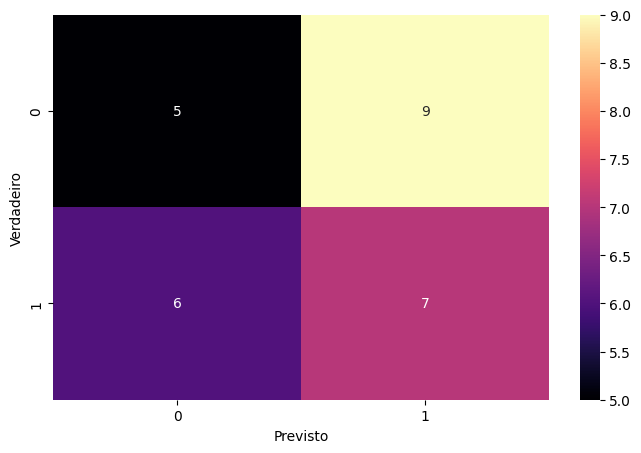

-------------------------------------------------------------------------------------------------------
Matriz de Confusão GINI SMOTE:  
 [[8 6]
 [8 5]]


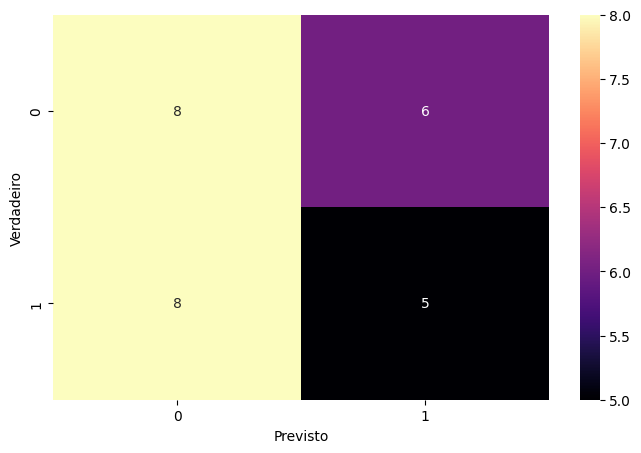

In [17]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_gini = confusion_matrix(y_teste, previsoes_gini)
print("Matriz de Confusão GINI: ", "\n", matriz_de_confusao_gini)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_gini, annot=True, fmt='d', cmap='magma', xticklabels = classificador_gini.classes_, yticklabels = classificador_gini.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

# MATRIZ DE CONFUSÃO GINI - SMOTE
matriz_de_confusao_gini_smote = confusion_matrix(y_teste, previsoes_gini_smote)
print("Matriz de Confusão GINI SMOTE: ", "\n", matriz_de_confusao_gini_smote)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_gini_smote, annot=True, fmt='d', cmap='magma', xticklabels = classificador_gini_smote.classes_, yticklabels = classificador_gini_smote.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

##### Cross Validation

In [18]:
# Parâmetros
parametros_gini = {
    'criterion': ['gini'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}


# Criando classificador com os hyper parameters
classificador_gini_smote_cross_validation = tree.DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 4,
    max_features = 'sqrt',
    min_samples_leaf = 10,
    min_samples_split = 10,
    splitter = 'best'
    )

# Criando objeto GridSearchCV, para o Cross Validation com os hyperparametros
gini_cross_validantion_grid = GridSearchCV(estimator = classificador_gini_smote_cross_validation, param_grid = parametros_gini, scoring = 'accuracy', cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo com o SMOTE
gini_cross_validantion_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_gini_cross_validation = gini_cross_validantion_grid.predict(X_teste)

print("-"*100)

# Mostrando os melhores hyperparameters
print("Melhores hyperparameters: ", gini_cross_validantion_grid.best_params_)

# Mostrando as melhor acurácia

gini_resultados_smote = gini_cross_validantion_grid.cv_results_
gini_smote_acuracias_cross_validation = gini_resultados_smote['mean_test_score']

gini_melhor_acuracias_smote = sorted(gini_smote_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", gini_melhor_acuracias_smote)

gini_acuracias_media_smote = np.mean(gini_melhor_acuracias_smote)
print("Média das acurácias GINI: ", gini_acuracias_media_smote)

print("-"*100)


----------------------------------------------------------------------------------------------------
Melhores hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Melhores acurácias:  [0.6552910052910053, 0.6322751322751323, 0.6320105820105819, 0.6320105820105819, 0.6320105820105819]
Média das acurácias GINI:  0.6367195767195767
----------------------------------------------------------------------------------------------------


In [19]:
# Métricas Bayes com SMOTE
reporte_de_classificacao_gini_cross_validation = classification_report(y_teste, previsoes_gini_cross_validation)
print("Métricas Bayes com SMOTE: \n", reporte_de_classificacao_gini_cross_validation)

Métricas Bayes com SMOTE: 
               precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.47      0.54      0.50        13

    accuracy                           0.48        27
   macro avg       0.48      0.48      0.48        27
weighted avg       0.48      0.48      0.48        27



Matriz de Confusão

Matriz de Confusão GINI:  
 [[6 8]
 [6 7]]


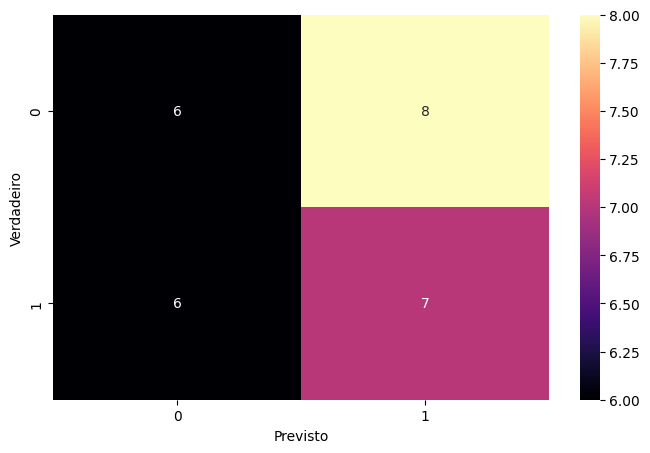

-------------------------------------------------------------------------------------------------------


In [20]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_gini_cross_validation = confusion_matrix(y_teste, previsoes_gini_cross_validation)
print("Matriz de Confusão GINI: ", "\n", matriz_de_confusao_gini_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_gini_cross_validation, annot=True, fmt='d', cmap='magma')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

##### Conclusão Árvore de Decisão - GINI

...

#### Entropia

In [21]:
# Criando classificador
classificador_entropy = tree.DecisionTreeClassifier(criterion = 'entropy')

# Criando classificador Smote
classificador_entropy_smote = tree.DecisionTreeClassifier(criterion = 'entropy')


# Treinando o modelo
classificador_entropy.fit(X_treino, y_treino)

# Treinando o modelo SMOTE
classificador_entropy_smote.fit(X_treino_smote, y_treino_smote)

DecisionTreeClassifier(criterion='entropy')

##### Prevendo o Modelo - Com o conjunto de teste

In [22]:
# Prevendo o Modelo
previsoes_entropy = classificador_entropy.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_entropy_smote = classificador_entropy_smote.predict(X_teste)

Métricas (Antes do Cross Validation)

In [23]:
reporte_de_classificacao_entropy = classification_report(y_teste, previsoes_entropy)
print("Métricas Árvore de Decisão - ENTROPIA: \n", reporte_de_classificacao_entropy)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_entropy_smote = classification_report(y_teste, previsoes_entropy_smote)
print("Métricas Árvore de Decisão com SMOTE - ENTROPIA: \n", reporte_de_classificacao_entropy_smote)

Métricas Árvore de Decisão - ENTROPIA: 
               precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.40      0.46      0.43        13

    accuracy                           0.41        27
   macro avg       0.41      0.41      0.41        27
weighted avg       0.41      0.41      0.41        27

-------------------------------------------------------------
Métricas Árvore de Decisão com SMOTE - ENTROPIA: 
               precision    recall  f1-score   support

           0       0.60      0.43      0.50        14
           1       0.53      0.69      0.60        13

    accuracy                           0.56        27
   macro avg       0.56      0.56      0.55        27
weighted avg       0.57      0.56      0.55        27



Matriz de Confusão

Matriz de Confusão ENTROPY:  
 [[5 9]
 [6 7]]


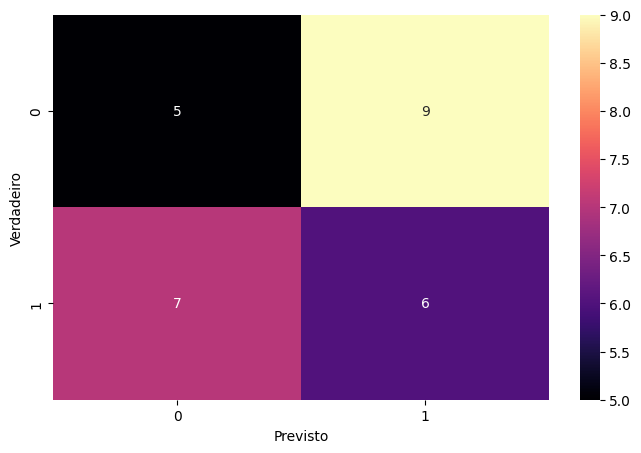

-------------------------------------------------------------------------------------------------------
Matriz de Confusão ENTROPY SMOTE:  
 [[6 8]
 [4 9]]


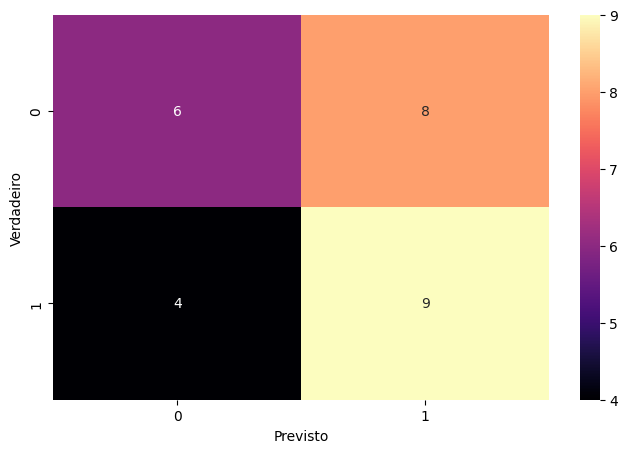

In [24]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_entropy = confusion_matrix(y_teste, previsoes_entropy)
print("Matriz de Confusão ENTROPY: ", "\n", matriz_de_confusao_gini)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_entropy, annot=True, fmt='d', cmap='magma', xticklabels = classificador_entropy.classes_, yticklabels = classificador_entropy.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

# MATRIZ DE CONFUSÃO GINI - SMOTE
matriz_de_confusao_entropy_smote = confusion_matrix(y_teste, previsoes_entropy_smote)
print("Matriz de Confusão ENTROPY SMOTE: ", "\n", matriz_de_confusao_entropy_smote)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_entropy_smote, annot=True, fmt='d', cmap='magma', xticklabels = classificador_entropy_smote.classes_, yticklabels = classificador_entropy_smote.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

##### Cross Validation

In [25]:
# Parâmetros
parametros_entropy = {
    'criterion': ['entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}


# Criando classificador com os hyper parameters
classificador_entropy_smote_cross_validation = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = None,
    max_features = None,
    min_samples_leaf = 1,
    min_samples_split = 10,
    splitter = 'random'
    )

# Criando objeto GridSearchCV, para o Cross Validation com os hyperparametros
entropy_cross_validantion_grid = GridSearchCV(estimator = classificador_entropy_smote_cross_validation, param_grid = parametros_entropy, scoring = 'f1', cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo com o SMOTE
entropy_cross_validantion_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_entropy_cross_validation = entropy_cross_validantion_grid.predict(X_teste)

print("-"*100)

# Mostrando os melhores hyperparameters
print("Melhores hyperparameters: ", entropy_cross_validantion_grid.best_params_)

# Mostrando as melhor acurácia

entropy_resultados_smote = entropy_cross_validantion_grid.cv_results_
entropy_smote_acuracias_cross_validation = entropy_resultados_smote['mean_test_score']

entropy_melhor_acuracias_smote = sorted(entropy_smote_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", entropy_melhor_acuracias_smote)

entropy_acuracias_media_smote = np.mean(entropy_melhor_acuracias_smote)
print("Média das acurácias ENTROPY: ", entropy_acuracias_media_smote)

print("-"*100)

----------------------------------------------------------------------------------------------------
Melhores hyperparameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
Melhores acurácias:  [0.6453333333333333, 0.6359424209463895, 0.6326007326007326, 0.6308434484905072, 0.6308151443991266]
Média das acurácias ENTROPY:  0.6351070159540179
----------------------------------------------------------------------------------------------------


Métricas

In [26]:
# Métricas Bayes com SMOTE
reporte_de_classificacao_entropy_cross_validation = classification_report(y_teste, previsoes_entropy_cross_validation)
print("Métricas Entropia com SMOTE: \n", reporte_de_classificacao_entropy_cross_validation)

Métricas Entropia com SMOTE: 
               precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.47      0.54      0.50        13

    accuracy                           0.48        27
   macro avg       0.48      0.48      0.48        27
weighted avg       0.48      0.48      0.48        27



Matriz de Confusão

Matriz de Confusão GINI:  
 [[6 8]
 [6 7]]


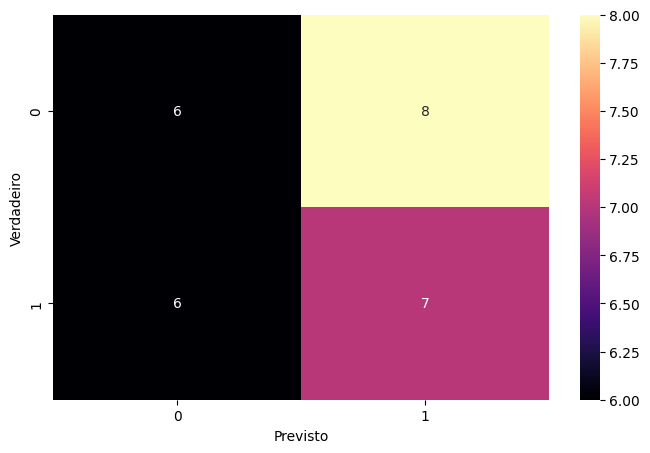

-------------------------------------------------------------------------------------------------------


In [27]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_entropy_cross_validation = confusion_matrix(y_teste, previsoes_entropy_cross_validation)
print("Matriz de Confusão GINI: ", "\n", matriz_de_confusao_entropy_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_entropy_cross_validation, annot=True, fmt='d', cmap='magma')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

##### Conclusão Árvore de Decisão - Entropia

...

### KNN 👥

Criando o classificador para ver o melhor k

In [28]:
# Criando um intervalor - 2 a 40

intervalo = range(1, 40)

# Criando uma lista de acurácias para melhor k
acuracias = []
acuracias_smote = []

for k in intervalo:
    # Criando classificador no for
    classificador_knn_melhor_k = KNeighborsClassifier(n_neighbors = k)
    # Criando classificador no for com SMOTE
    classificador_knn_smote_melhor_k = KNeighborsClassifier(n_neighbors = k)

    # Treinando o Modelo
    classificador_knn_melhor_k.fit(X_treino, y_treino)
    # Treinando o Modelo com SMOTE
    classificador_knn_smote_melhor_k.fit(X_treino_smote, y_treino_smote)

    # Testando o Modelo
    previsoes_knn_melhor_k = classificador_knn_melhor_k.predict(X_teste)
    # Testando o Modelo com SMOTE
    previsoes_knn_smote_melhor_k = classificador_knn_smote_melhor_k.predict(X_teste)

    # Adicionando as acurácias na lista
    acuracias.append(accuracy_score(previsoes_knn_melhor_k, y_teste))
    acuracias_smote.append(accuracy_score(previsoes_knn_smote_melhor_k, y_teste))

# Encontrando melhor k
melhor_k = intervalo[acuracias.index(max(acuracias))]
melhor_k_smote = intervalo[acuracias_smote.index(max(acuracias_smote))]

# Mostrando os melhores k
print(f"Melhor k: {melhor_k}")
print(f"Melhor k com SMOTE: {melhor_k_smote}")

Melhor k: 20
Melhor k com SMOTE: 34


Criando os classificadores com os melhores k

In [29]:
# Criando classificador
classificador_knn = KNeighborsClassifier(n_neighbors = melhor_k)

# Criando classificador com SMOTE
classificador_knn_smote = KNeighborsClassifier(n_neighbors = melhor_k_smote)

# Treinando o modelo
classificador_knn.fit(X_treino, y_treino)

# Treinando o modelo SMOTE
classificador_knn_smote.fit(X_treino_smote, y_treino_smote)

KNeighborsClassifier(n_neighbors=34)

Prevendo o Modelo (Com o conjunto de teste)

In [30]:
# Prevendo o Modelo
previsoes_knn = classificador_knn.predict(X_teste)

# Prevendo o Modelo com o SMOTE
previsoes_knn_smote = classificador_knn_smote.predict(X_teste)

Mostrando as Métricas (Antes do Cross Validation)

In [31]:
reporte_de_classificacao_knn = classification_report(y_teste, previsoes_knn)
print("Métricas KNN: \n", reporte_de_classificacao_knn)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_knn_smote = classification_report(y_teste, previsoes_knn_smote)
print("Métricas KNN com SMOTE: \n", reporte_de_classificacao_knn_smote)

Métricas KNN: 
               precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.55      0.92      0.69        13

    accuracy                           0.59        27
   macro avg       0.67      0.60      0.55        27
weighted avg       0.68      0.59      0.55        27

-------------------------------------------------------------
Métricas KNN com SMOTE: 
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.64      0.54      0.58        13

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.62        27
weighted avg       0.63      0.63      0.63        27



Matriz de confusão

Matriz de Confusão - KNN:  
 [[ 4 10]
 [ 1 12]]


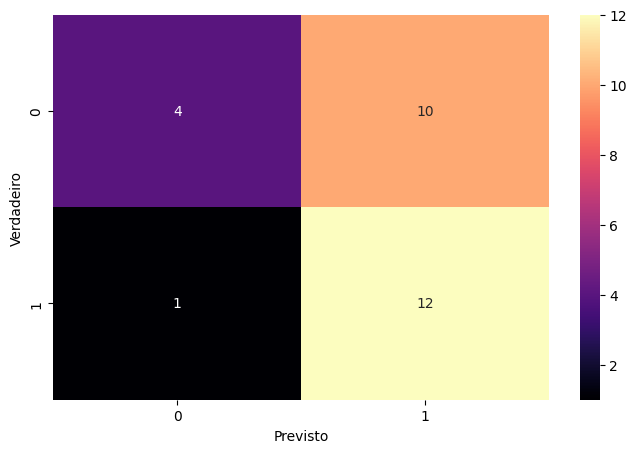

-------------------------------------------------------------------------------------------------------
Matriz de Confusão com SMOTE - KNN:  
 [[10  4]
 [ 6  7]]


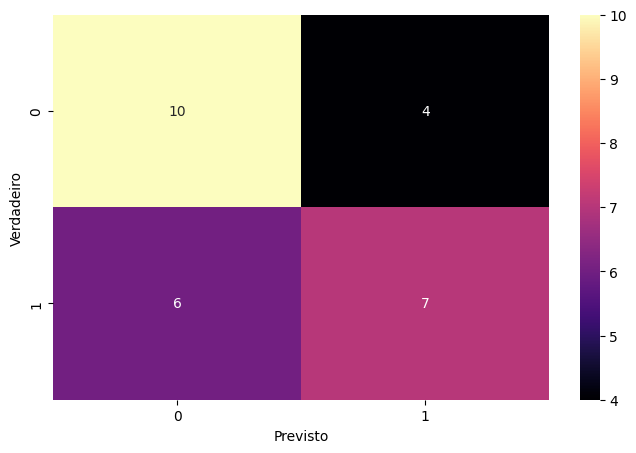

In [32]:
# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_knn = confusion_matrix(y_teste, previsoes_knn)
print("Matriz de Confusão - KNN: ", "\n", matriz_de_confusao_knn)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_knn, annot=True, fmt='d', cmap='magma', xticklabels = classificador_knn.classes_, yticklabels = classificador_knn.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_knn_smote = confusion_matrix(y_teste, previsoes_knn_smote)
print("Matriz de Confusão com SMOTE - KNN: ", "\n", matriz_de_confusao_knn_smote)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_knn_smote, annot=True, fmt='d', cmap='magma', xticklabels = classificador_knn_smote.classes_, yticklabels = classificador_knn_smote.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

#### Cross Validation

In [33]:
# Criando classificador
classificador_knn_cross_validation = KNeighborsClassifier()

# Parâmetros para o Cross Validation
parametros = {'n_neighbors': range(1, 40)}

# Usando o GridSearchCV
classificador_knn_cross_validation_grid = GridSearchCV(estimator = classificador_knn_cross_validation, param_grid = parametros, scoring = "recall", cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo
classificador_knn_cross_validation_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_knn_cross_validation_grid = classificador_knn_cross_validation_grid.predict(X_teste)

Métricas

In [34]:
reporte_de_classificacao_knn_cross_validation_grid = classification_report(y_teste, previsoes_knn_cross_validation_grid)
print("Métricas KNN: ")
print(reporte_de_classificacao_knn_cross_validation_grid)

Métricas KNN: 
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        14
           1       0.36      0.31      0.33        13

    accuracy                           0.41        27
   macro avg       0.40      0.40      0.40        27
weighted avg       0.40      0.41      0.40        27



#### Conclusão KNN

...